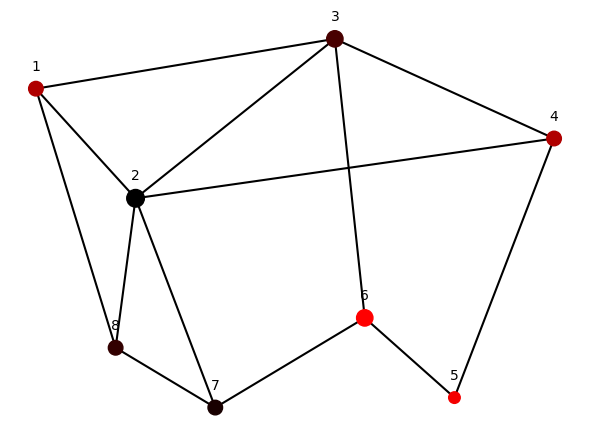

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap: grey (low) -> dark red (high)
custom_cmap = LinearSegmentedColormap.from_list("gray_to_darkred", ["black", "red"])


M_xy  = np.array([[1,4.5],[2,3.4],[4,5],[6.2,4],[5.2,1.4],[4.3,2.2],[2.8,1.3],[1.8,1.9]])
M_adj = np.array([
  [3, 1, 1, 0, 0, 0, 0, 1],
  [1, 5, 1, 1, 0, 0, 1, 1],
  [1, 1, 4, 1, 0, 1, 0, 0],
  [0, 1, 1, 3, 1, 0, 0, 0],
  [0, 0, 0, 1, 2, 1, 0, 0],
  [0, 0, 1, 0, 1, 4, 1, 0],
  [0, 1, 0, 0, 0, 1, 3, 1],
  [1, 1, 0, 0, 0, 0, 1, 3]
])
# Grid size
rows, cols = 4, 4

# Generate grid coordinates
x = np.arange(cols)
y = np.arange(rows)
xx, yy = np.meshgrid(x, y)

# Flatten grid for easier plotting
x_flat = xx.flatten()
y_flat = yy.flatten()

# Generate random values between 0 and 1 for each vertex
values = np.random.rand(M_xy.shape[0])

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Draw mesh lines between connected vertices
for row in range(M_adj.shape[0]):
  for col in range(row,M_adj.shape[1]):
    if M_adj[row,col] != 0:
      ax.plot([M_xy[row,0], M_xy[col,0]], [M_xy[row,1], M_xy[col,1]], color='black', zorder=0)

# Scatter plot for vertices with color mapping
sc = ax.scatter(M_xy[:,0], M_xy[:,1], c=values, cmap=custom_cmap, s=np.log(np.diag(M_adj))*100, marker='o', zorder=1)
# Add labels to each vertex
for i, (x, y) in enumerate(M_xy):
  ax.text(x, y + 0.15, str(i + 1), ha='center', va='bottom', fontsize=10)

# Clean look
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.show()